# PreProcessing on data : 

### import library : 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re 

%matplotlib inline

### 1 ) Read data :

In [2]:
df = pd.read_csv('./Data/Hourly_consumption_MW.csv')
df.head()

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0


### 2 ) Cleaning data : 

Data shape before cleanning :  (119068, 2)
Data shape after cleanning :  (119068, 7)


C:\Users\Sina\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Sina\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Sina\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Sina\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning

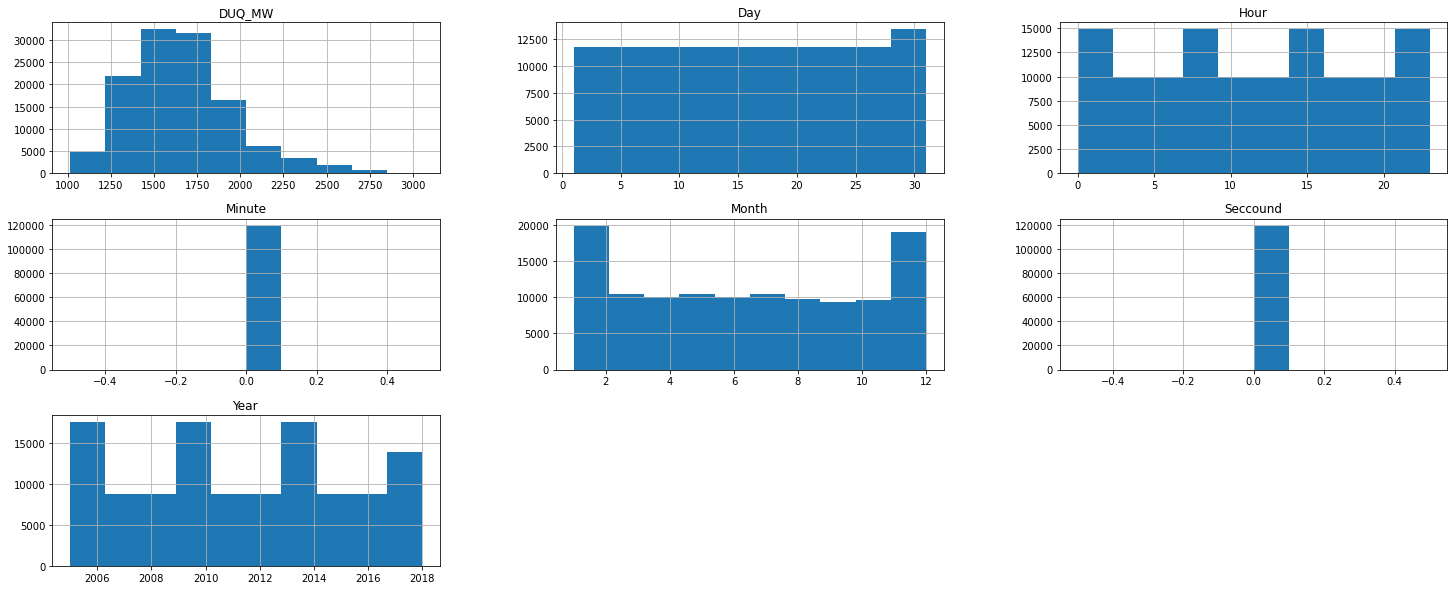

In [3]:
print('Data shape before cleanning : ' , df.shape)

# Splite time :
Slice = list(map(lambda x : re.findall('\d+' ,x) , df['Datetime'].to_list()))

df['Year'] = list(map(lambda x : int(x[0]) , Slice))
df['Month'] = list(map(lambda x : int(x[1]) , Slice))
df['Day'] = list(map(lambda x : int(x[2]) , Slice))
df['Hour'] = list(map(lambda x : int(x[3]) , Slice))
df['Minute'] = list(map(lambda x : int(x[4]) , Slice))
df['Seccound'] = list(map(lambda x : int(x[5]) , Slice))

# Remove main time column : 
df = df.drop(['Datetime'], axis=1)

# Drop Nan value : 
df = df.dropna()
df = df.reset_index(drop = True)

# Change type DUQ_MW column to float : 
df['DUQ_MW'] = (df['DUQ_MW']).astype(float)

# Sort : 
df = df.sort_values(by=['Year' , 'Month' ,'Day' , 'Hour'])
df = df.reset_index(drop = True)

print('Data shape after cleanning : ' , df.shape)

# plot data :
df.hist(figsize = (25 , 10))
plt.show()

In [4]:
df.head()

,DUQ_MW,Year,Month,Day,Hour,Minute,Seccound
0,1364.0,2005,1,1,1,0,0
1,1273.0,2005,1,1,2,0,0
2,1218.0,2005,1,1,3,0,0
3,1170.0,2005,1,1,4,0,0
4,1166.0,2005,1,1,5,0,0


### 3 ) Plot Graph 1 : 

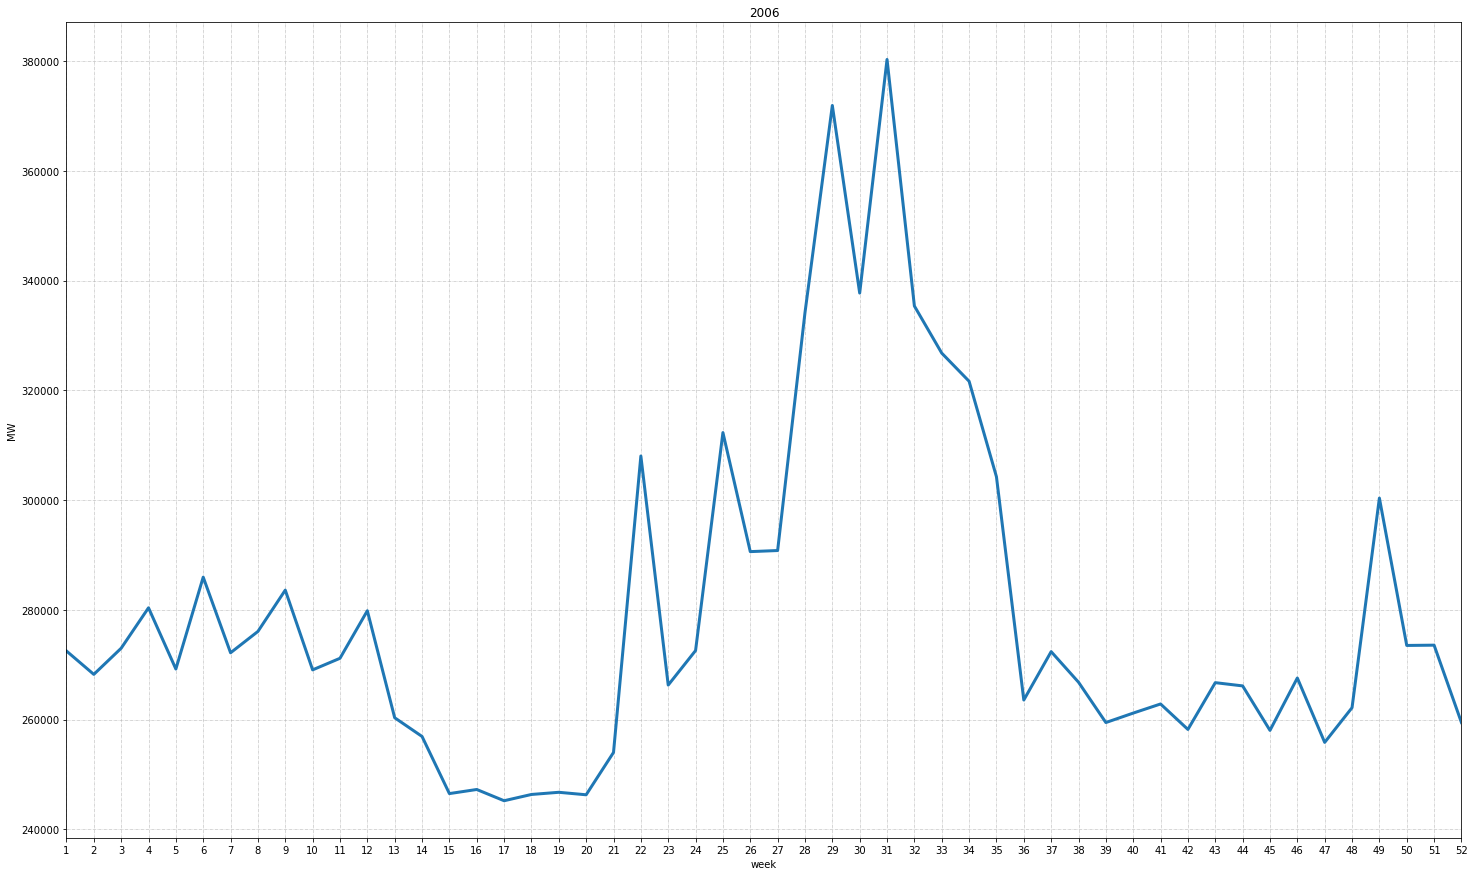

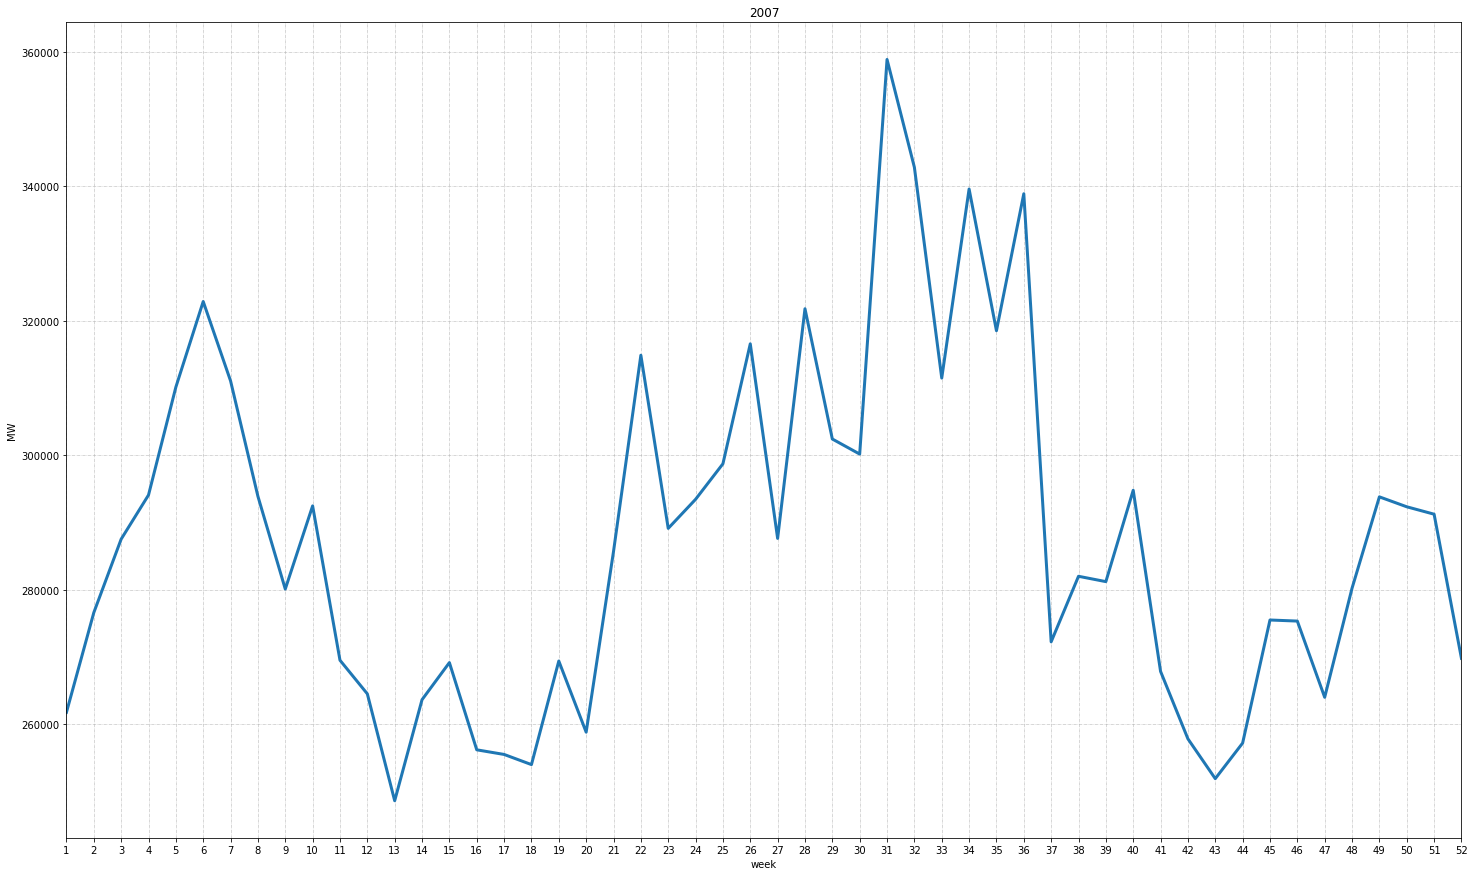

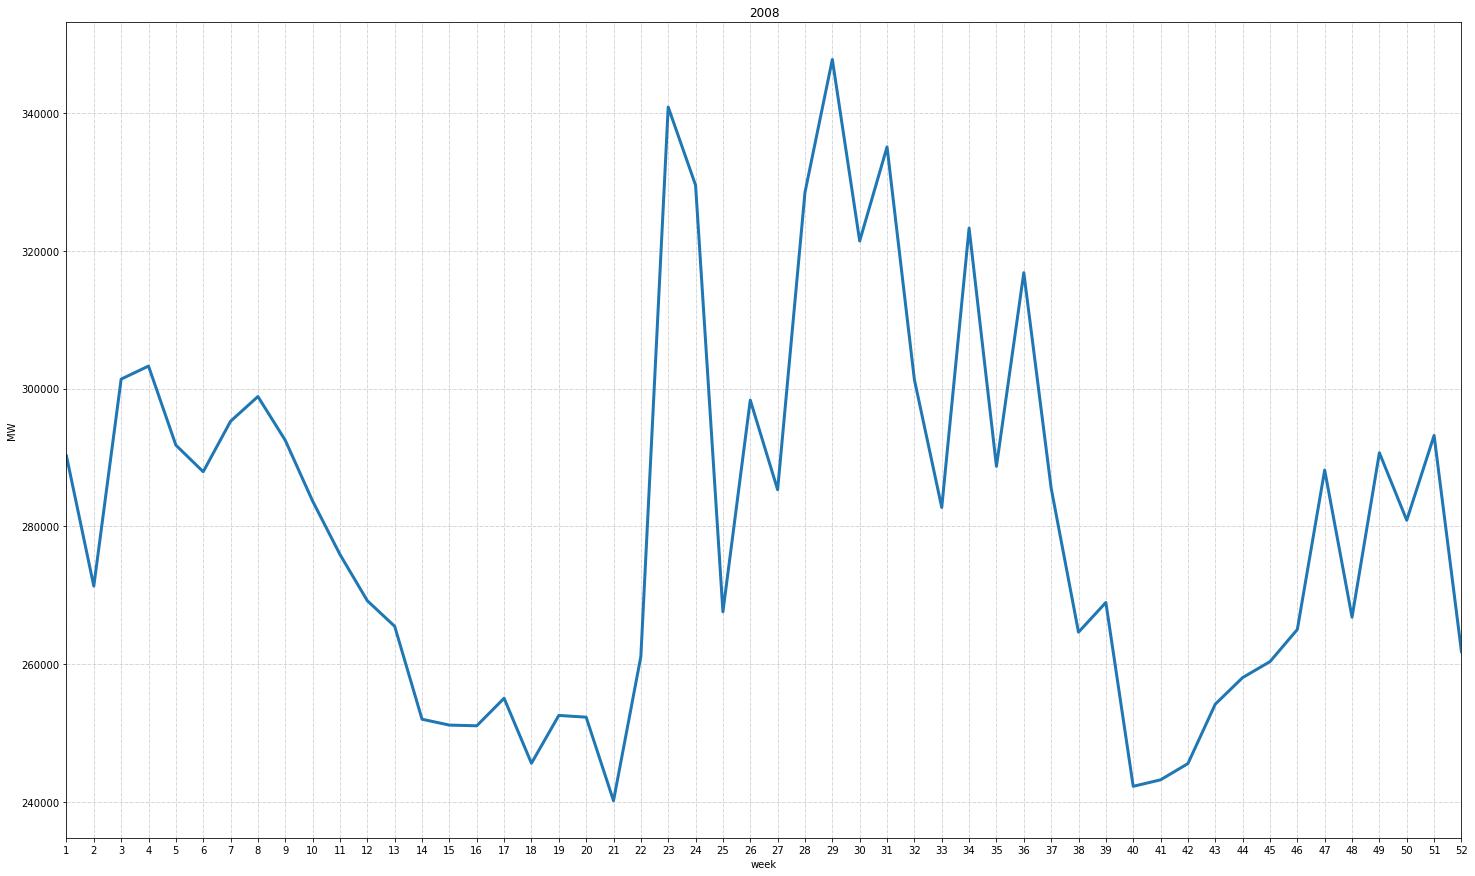

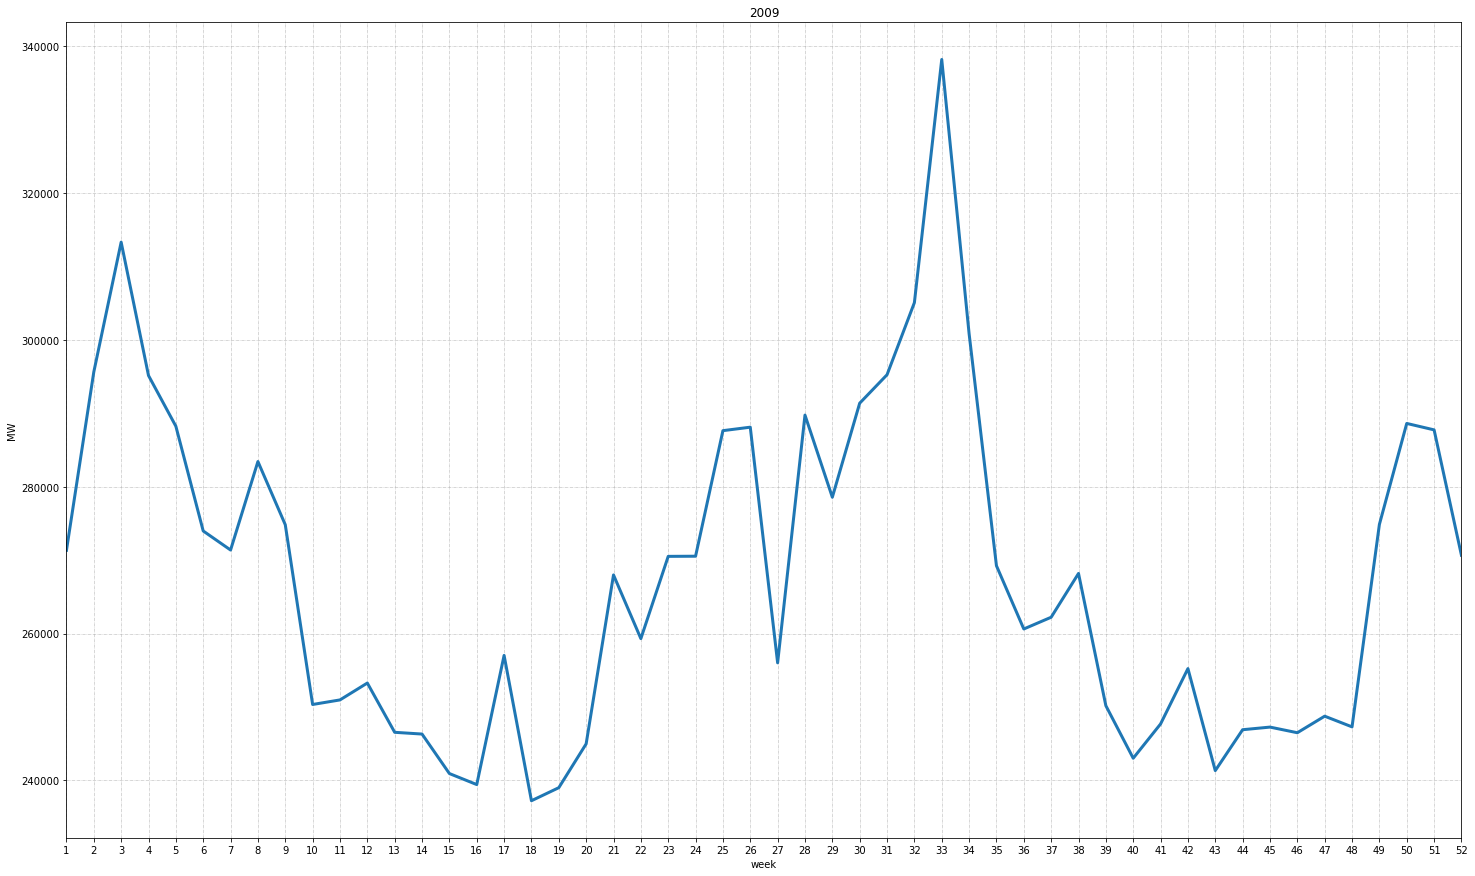

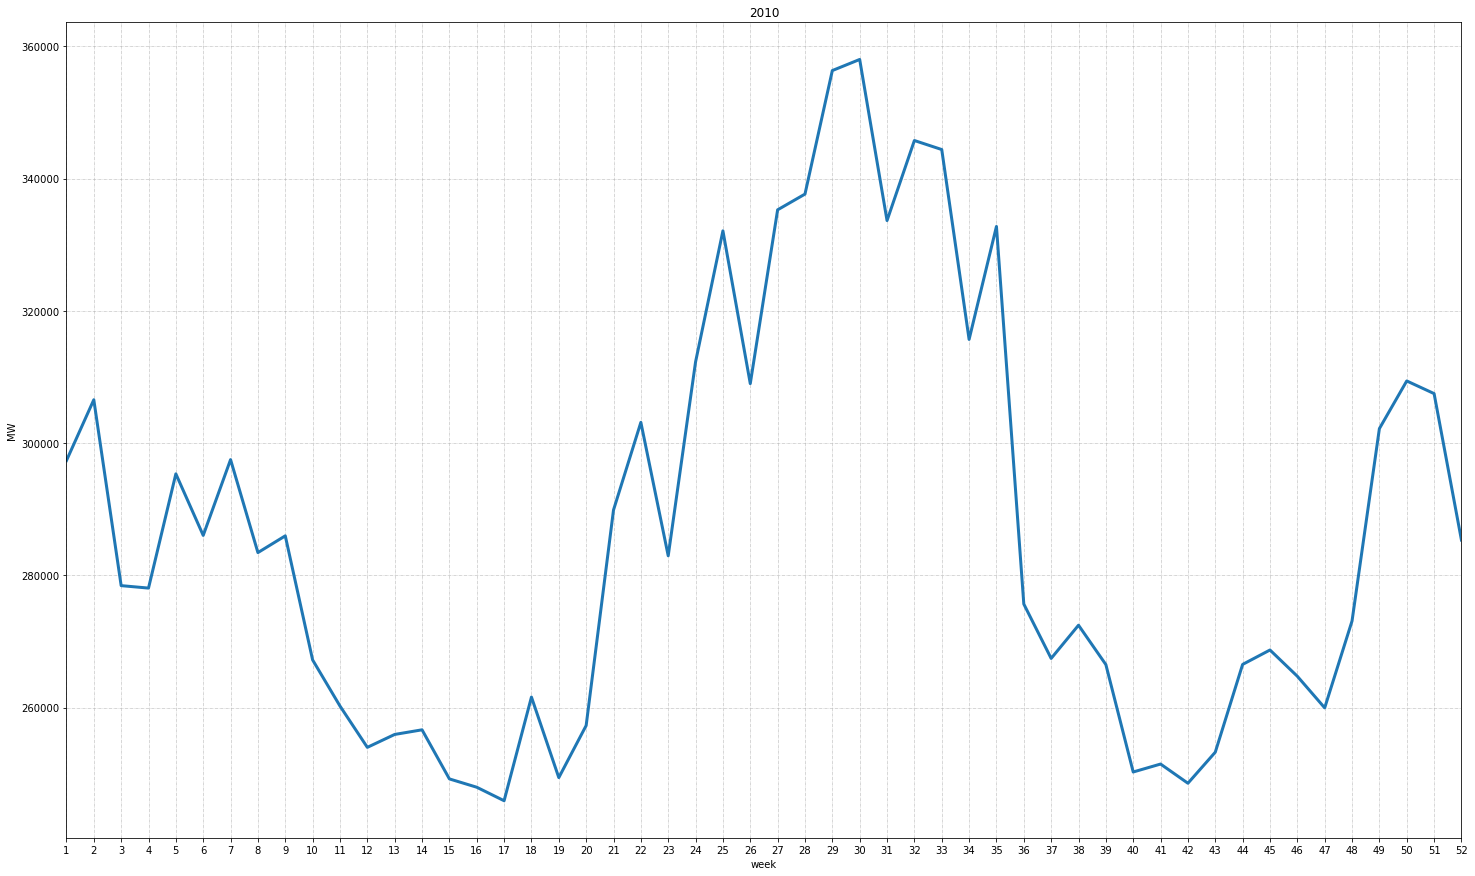

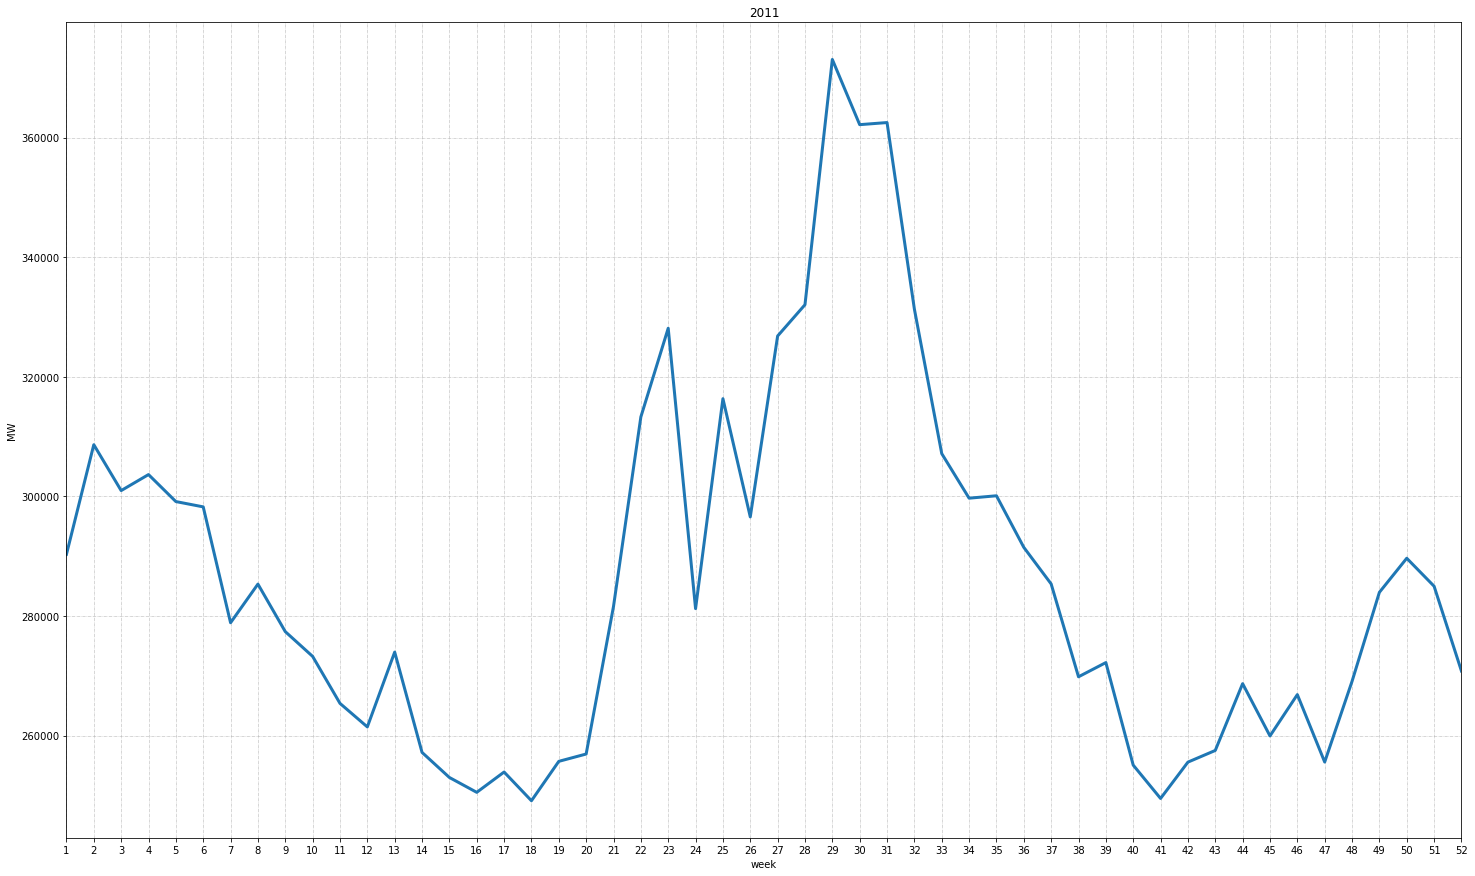

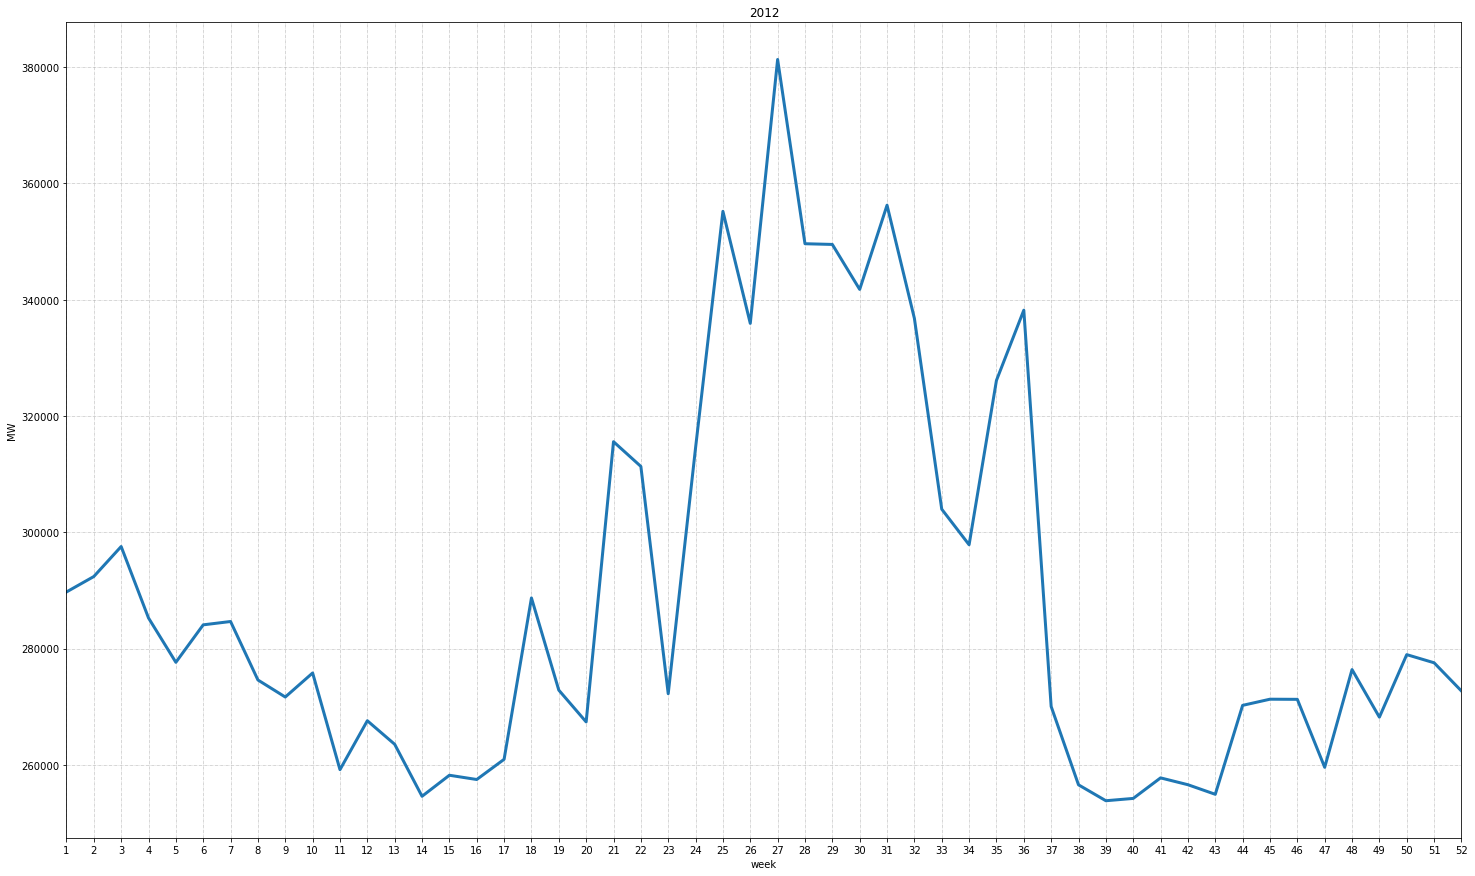

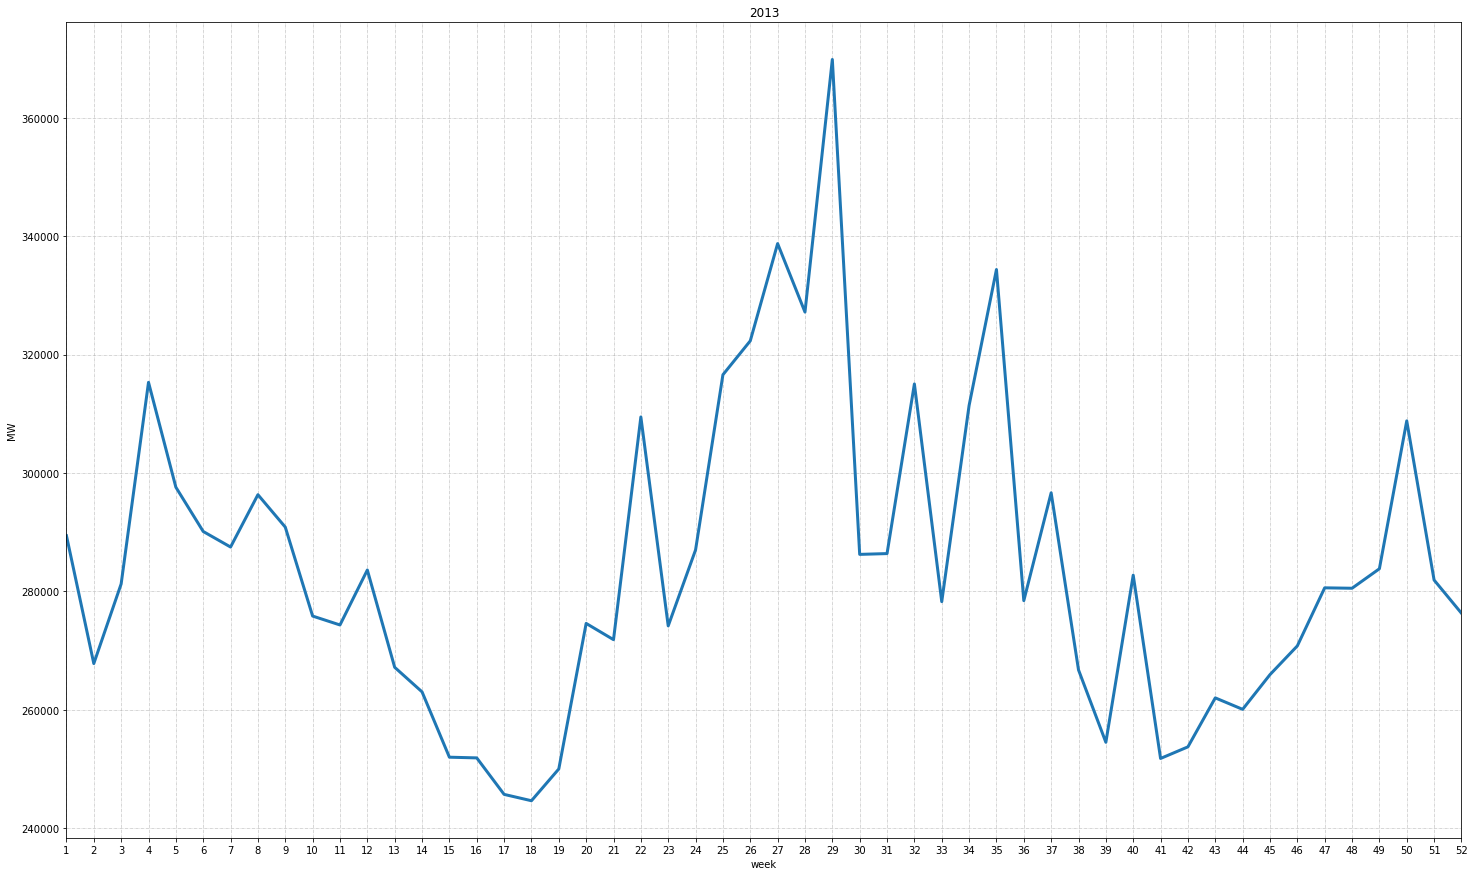

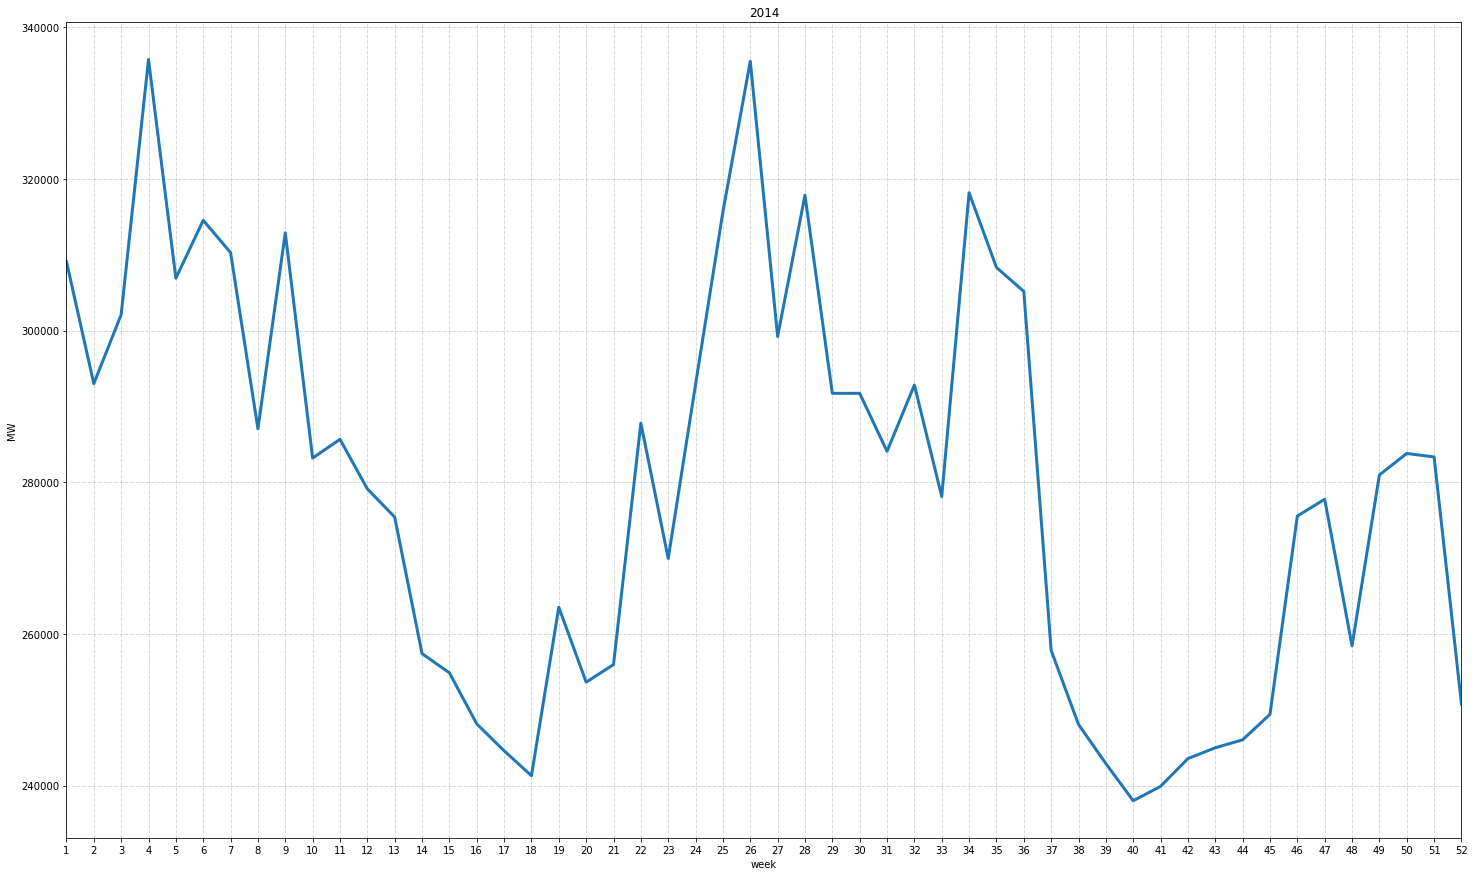

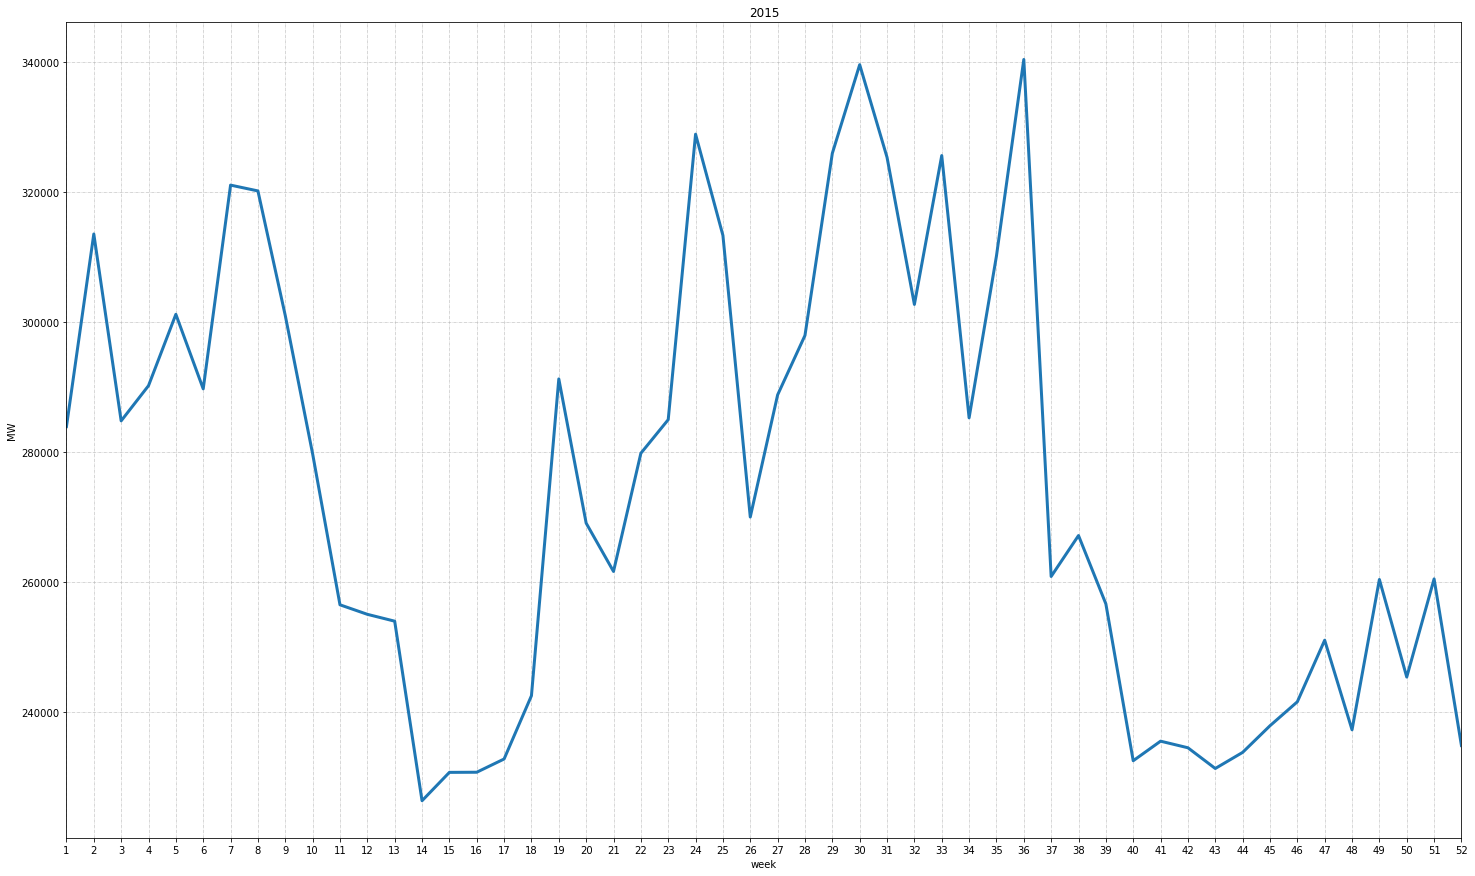

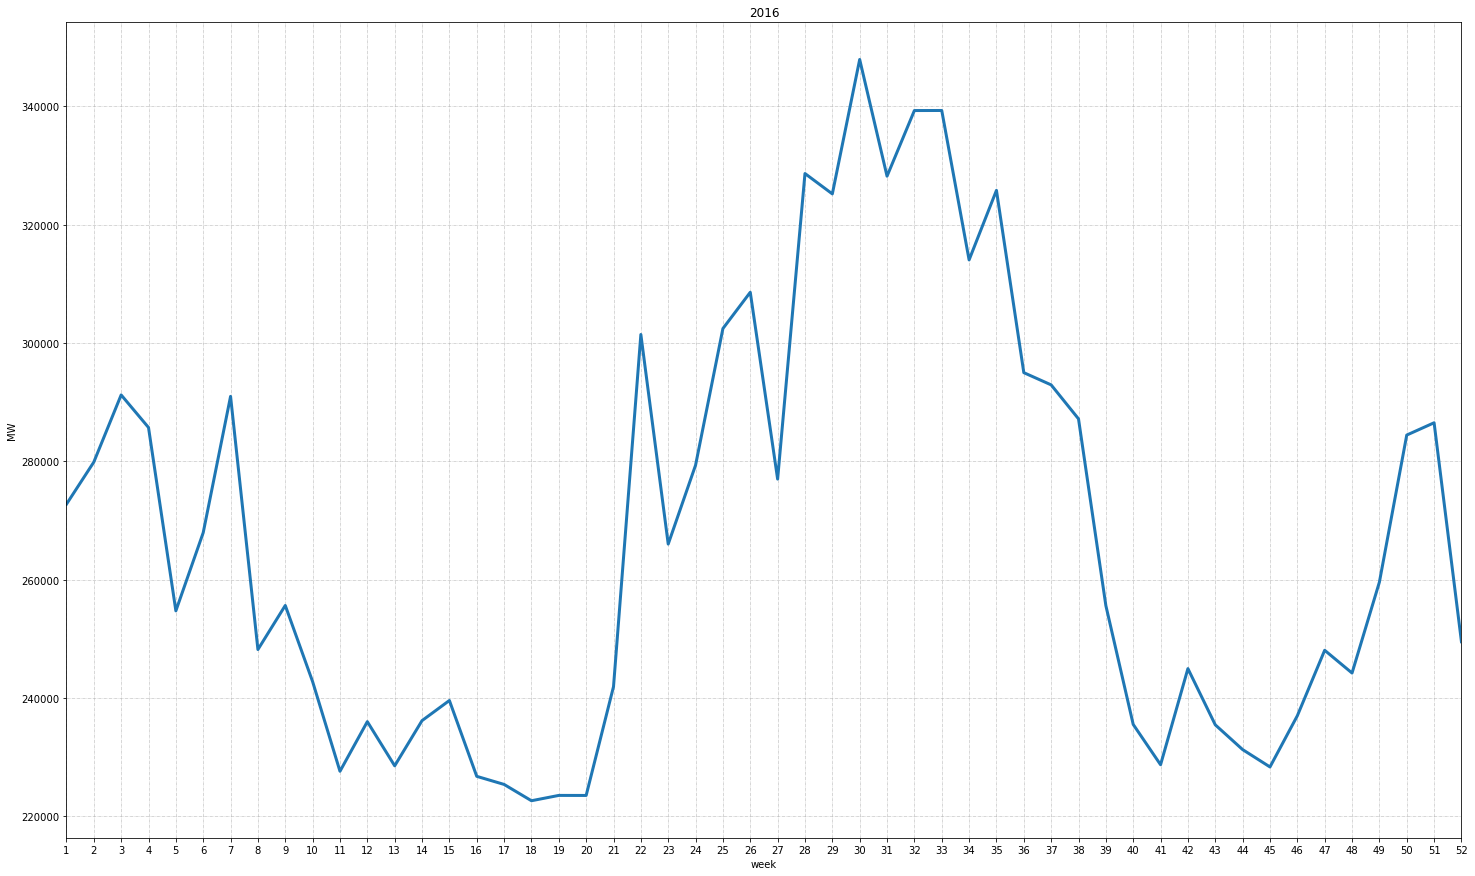

In [5]:
information = {}

# extract from df : 
for draw in range(2006 , 2017) : 
    new_df = df[df['Year'] == draw]
    
    MW_list = []
    for week in range(1 , 53) : 
        MW = new_df[(week-1) * 168 : ((week-1) * 168) + 168 ]['DUQ_MW'].sum()
        MW_list.append(MW)

    information[str(draw)] = MW_list

# plot : 
x = range(1 , 53)

for year in range(2006 , 2017) : 
    plt.figure(figsize=(25 , 15))
    plt.title(str(year))
    plt.xlabel('week')
    plt.ylabel('MW')
    y = information[str(year)]
    plt.plot(x , y ,linewidth=3)
    plt.grid( linestyle='-.', linewidth=0.5)
    plt.xlim(1,52)
    plt.xticks(x,x)
    plt.savefig('./Results/MW_per_week_{}'.format(str(year)))
    plt.show()

### 4 ) identify the day with the highest consumptions and the day with the lowest

In [6]:
df.head()

,DUQ_MW,Year,Month,Day,Hour,Minute,Seccound
0,1364.0,2005,1,1,1,0,0
1,1273.0,2005,1,1,2,0,0
2,1218.0,2005,1,1,3,0,0
3,1170.0,2005,1,1,4,0,0
4,1166.0,2005,1,1,5,0,0


------

2005  : 
the day with the highest consumptions : 2005.0-8.0-12.0-17.0-0.0-0.0
the day with the lowwest consumptions : 2005.0-4.0-10.0-4.0-0.0-0.0
------

2006  : 
the day with the highest consumptions : 2006.0-8.0-3.0-16.0-0.0-0.0
the day with the lowwest consumptions : 2006.0-4.0-16.0-5.0-0.0-0.0
------

2007  : 
the day with the highest consumptions : 2007.0-8.0-24.0-17.0-0.0-0.0
the day with the lowwest consumptions : 2007.0-10.0-21.0-5.0-0.0-0.0
------

2008  : 
the day with the highest consumptions : 2008.0-6.0-9.0-17.0-0.0-0.0
the day with the lowwest consumptions : 2008.0-5.0-25.0-5.0-0.0-0.0
------

2009  : 
the day with the highest consumptions : 2009.0-8.0-17.0-16.0-0.0-0.0
the day with the lowwest consumptions : 2009.0-5.0-17.0-5.0-0.0-0.0
------

2010  : 
the day with the highest consumptions : 2010.0-7.0-23.0-15.0-0.0-0.0
the day with the lowwest consumptions : 2010.0-10.0-10.0-5.0-0.0-0.0
------

2011  : 
the day with the highest consumptions : 2011.0-7.0-21.0-17.

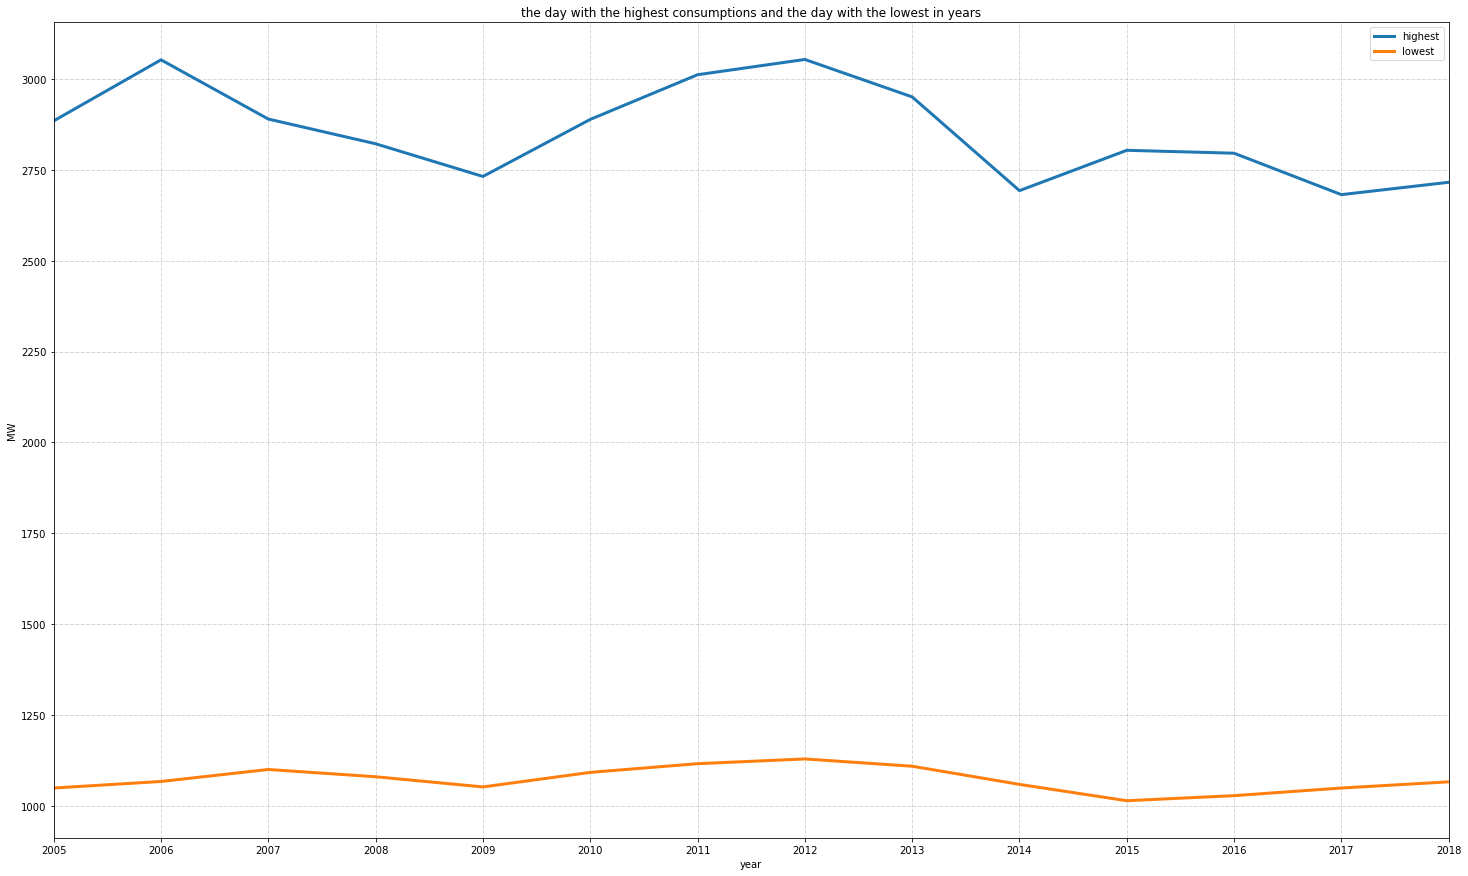

In [7]:
information = {}

# identify : 
for year in range(df['Year'].min() , df['Year'].max() + 1) : 
    print('------\n')
    print(year , ' : ')
    new_df = df[df['Year'] == year]

    information[str(year)] = [new_df['DUQ_MW'].max() , new_df['DUQ_MW'].min() ]

    y , m , d, h , minute , s = new_df[new_df['DUQ_MW'] == new_df['DUQ_MW'].max()].values[0][1:]
    print('the day with the highest consumptions : {}-{}-{}-{}-{}-{}'.format(y , m , d , h, minute , s) )

    y , m , d, h , minute , s = new_df[new_df['DUQ_MW'] == new_df['DUQ_MW'].min()].values[0][1:]
    print('the day with the lowwest consumptions : {}-{}-{}-{}-{}-{}'.format(y , m , d , h, minute , s) )

# plot : 
x = range(df['Year'].min() , df['Year'].max() + 1)
plt.figure(figsize=(25 , 15))
plt.title('the day with the highest consumptions and the day with the lowest in years')
plt.xlabel('year')
plt.ylabel('MW')
y_max = list(map(lambda y : y[0] , list(information.values())))
y_min = list(map(lambda y : y[1] , list(information.values())))
plt.plot(x , y_max ,linewidth=3)
plt.plot(x , y_min ,linewidth=3)
plt.grid( linestyle='-.', linewidth=0.5)
plt.xlim(2005 , 2018)
plt.xticks(x,x)
plt.legend(['highest' , 'lowest'])
plt.savefig('./Results/the day with the highest consumptions and the day with the lowest in years.png')
plt.show()


### 5 ) Identify the 10 days where the delta between the energy consumed in that day and in the day after is greater

In [8]:
df.head()

,DUQ_MW,Year,Month,Day,Hour,Minute,Seccound
0,1364.0,2005,1,1,1,0,0
1,1273.0,2005,1,1,2,0,0
2,1218.0,2005,1,1,3,0,0
3,1170.0,2005,1,1,4,0,0
4,1166.0,2005,1,1,5,0,0


In [9]:
information = []
for year in range(df['Year'].min() , df['Year'].max()) : 
    for month in range(1 , 13) : 


        new_df = df[(df['Year'] == year) & (df['Month'] == month)].groupby(['Day'])


        for day in range(2 , 29) : 
            mw_today = new_df.get_group(day)['DUQ_MW'].sum()
            mw_yesterday = new_df.get_group(day - 1)['DUQ_MW'].sum()
            if mw_today > mw_yesterday : 
                information.append([[year , month , day ] , [year , month , day - 1]])

information[:10]

[[[2005, 1, 2], [2005, 1, 1]],
 [[2005, 1, 3], [2005, 1, 2]],
 [[2005, 1, 4], [2005, 1, 3]],
 [[2005, 1, 5], [2005, 1, 4]],
 [[2005, 1, 7], [2005, 1, 6]],
 [[2005, 1, 10], [2005, 1, 9]],
 [[2005, 1, 11], [2005, 1, 10]],
 [[2005, 1, 14], [2005, 1, 13]],
 [[2005, 1, 17], [2005, 1, 16]],
 [[2005, 1, 18], [2005, 1, 17]]]

### 6 ) Create DataFrame : 

In [10]:
df.head()

,DUQ_MW,Year,Month,Day,Hour,Minute,Seccound
0,1364.0,2005,1,1,1,0,0
1,1273.0,2005,1,1,2,0,0
2,1218.0,2005,1,1,3,0,0
3,1170.0,2005,1,1,4,0,0
4,1166.0,2005,1,1,5,0,0


In [11]:
sum_days , mean_days , std_days = [] , [] , []
y , m , d = [] , [] , []

for year in range(df['Year'].min() , df['Year'].max()) : 
    for month in range(1 , 13) : 

        new_df = df[(df['Year'] == year) & (df['Month'] == month)].groupby(['Day'])
        day_min , day_max = df[(df['Year'] == year) & (df['Month'] == month)]['Day'].min() , df[(df['Year'] == year) & (df['Month'] == month)]['Day'].max()

        for day in range(day_min , day_max + 1) : 
            sum_days.append(new_df.get_group(day)['DUQ_MW'].sum())
            mean_days.append(new_df.get_group(day)['DUQ_MW'].mean())
            std_days.append(new_df.get_group(day)['DUQ_MW'].std())

            y.append(year)
            m.append(month)
            d.append(day)

dict = {'Year': y ,
        'Month' : m ,
        'Day' : d , 
        'Sum_day' : sum_days ,
        'mean_day' : mean_days ,
        'std_day' : std_days }

ProductionSchedule = pd.DataFrame(dict)
ProductionSchedule.to_csv('./Results/ProductionSchedule.csv', index=False)

### 7 ) Optional : 

In [16]:
df['Option'] = ProductionSchedule['mean_day'] + 3 * ProductionSchedule['std_day']

,DUQ_MW,Year,Month,Day,Hour,Minute,Seccound,Option
0,1364.0,2005,1,1,1,0,0,1738.267677
1,1273.0,2005,1,1,2,0,0,1870.168614
2,1218.0,2005,1,1,3,0,0,2113.683376
3,1170.0,2005,1,1,4,0,0,2278.072570
4,1166.0,2005,1,1,5,0,0,2385.083726


In [18]:
filter_df = df[df['DUQ_MW'] >= df['Option']]
filter_df.head()

,DUQ_MW,Year,Month,Day,Hour,Minute,Seccound,Option
85,1799.0,2005,1,4,14,0,0,1601.954120
105,1795.0,2005,1,5,10,0,0,1637.510504
106,1842.0,2005,1,5,11,0,0,1648.948999
112,1915.0,2005,1,5,17,0,0,1768.596568
113,1983.0,2005,1,5,18,0,0,1717.604312
